In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions

## Input data

In [2]:
df = pd.DataFrame([['Storage site #1', 25, 3250, 20, 3220, 80, 0.17, 0.70, 200],
        ['Storage site #2', 50, 4500, 50, 3800, 45, 0.15, 0.85, 100],
        ['Storage site #3', 600, 2500, 5, 2000, 100, 0.25, 0.90, 30],
        ['Storage site #4', 200, 3700, 5, 3430, 20, 0.08, 0.95, 300],
        ['Storage site #5', 130, 3600, 0, 2850, 270, 0.15, 0.8, 40],   
        ['Storage site #6', 211.7, 1300, 0, 920, 310, 0.28, 0.54, 75],
        ['Storage site #7', 700, 1300, 0, 1500, 500, 0.28, 0.54, 75],
        ['Storage site #8', 76.7, 1300, 0, 920, 250, 0.28, 0.54, 150],
        ['Storage site #9', 700, 3000, 0, 1500, 50, 0.28, 0.7, 150],
        ['Storage site #10', 167.4, 1300, 0, 970, 100, 0.28, 0.54, 75],
        ['Storage site #11', 700, 2000, 0, 970, 70, 0.28, 0.54, 20],
        ['Storage site #12', 115.6, 2300, 0, 970, 100, 0.28, 0.9, 150]],
                  columns=['Prospect','Area [Km2]', 'Injection point [m]', 
                    'Level of Depletion [bar]', 'Crest [m]', 'Gross thickness [m]', 
                    'Porosity', 'NtG', 'Permeability [mD]'])

In [3]:
# Additional calculations based on input
df['KH [mDm]'] = df['Permeability [mD]'] * df['Gross thickness [m]'] * df.NtG
df['Net thickness [m]'] = df['Gross thickness [m]'] * df.NtG
df['GRV [e6 m3]'] = df['Area [Km2]'] * df['Gross thickness [m]']
df['Net Pore Volume [e6 m3]'] = df['GRV [e6 m3]'] * df.Porosity * df.NtG

por = df.Porosity
z = df['Injection point [m]']
depl = df['Level of Depletion [bar]']
crest = df['Crest [m]']
npv = df['Net Pore Volume [e6 m3]']
gross = df['Gross thickness [m]']
k = df['Permeability [mD]']
ntg = df.NtG
Nz = df['Net thickness [m]']

## Injectivity estimation based on Analogues
#### Thickness VS K [mD] as published ub CarbonNet Project (2015). Site characterisation for carbon storage in the near shore Gippsland Basin. Australia: The State of Victoria.

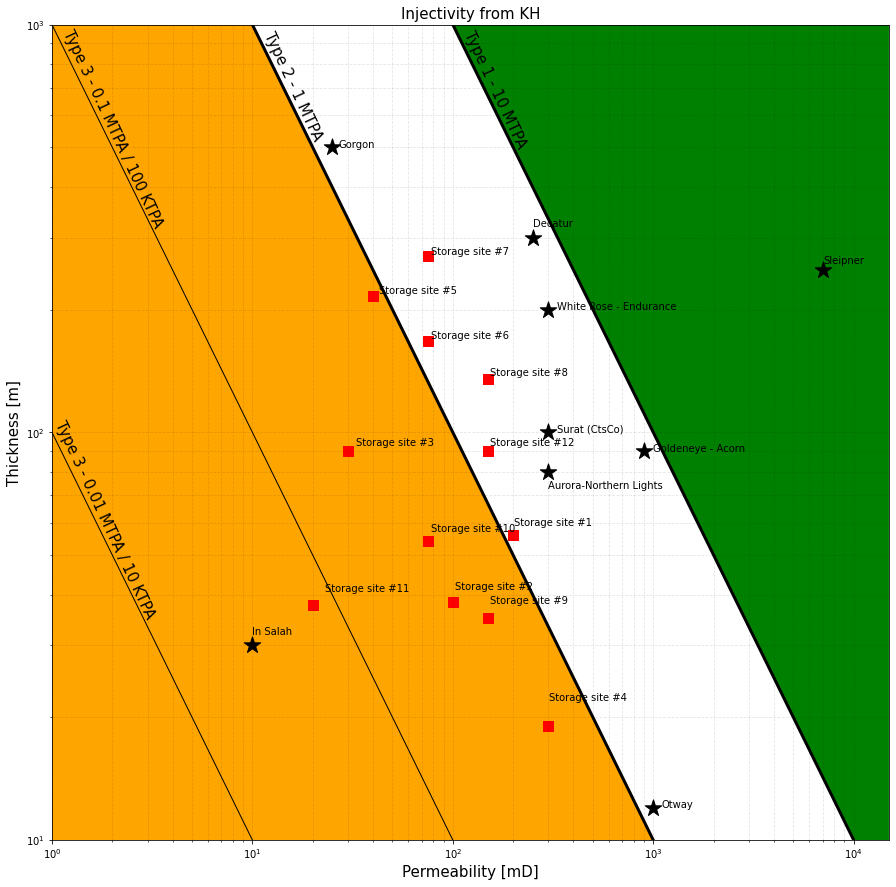

In [4]:
####################################################################################
dz = np.arange(10, 1000, 1)
K = np.arange(1, 15000, 1)
m = (np.log(1000)-np.log(10)) / (np.log(1)-np.log(100))

type_3_1 = 10000 * (K **(m))
type_3_2 = 1000 * (K **(m))
type_3_3 = 100 * (K **(m))
type_2 = 100000 * (K **(m))
type_1 = 100000000 * (K **(m))

# initialise plot
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 15),sharey=True)

#plot pressure lines
ax.plot(K , type_2, color="black", linewidth=3, linestyle="-")
ax.plot(K , type_1, color="black", linewidth=3, linestyle="-")
ax.plot(K , type_3_1, color="black", linewidth=3, linestyle="-")
ax.plot(K , type_3_2, color="black", linewidth=1, linestyle="-")
ax.plot(K , type_3_3, color="black", linewidth=1, linestyle="-")

# display legend
#ax.legend(loc='upper left', frameon=True, fontsize=18)

# set plot title and axis labels
ax.set_title('Injectivity from KH', fontsize=15)
ax.set_xlabel('Permeability [mD]', fontsize=15)
ax.set_ylabel('Thickness [m]', fontsize=15)

#show gridlines
ax.grid(True, which='both', linestyle='--', c='k', alpha=0.1)

# set axis limits
ax.set_xlim([1, 15000])
ax.set_ylim([10, 1000])

ax.set_xscale('log')
ax.set_yscale('log')

ax.fill_between(K, type_3_1, facecolor='orange', interpolate=True)
ax.fill_between(K, type_1, type_2, facecolor='green', interpolate=True)

ax.text(110, 500,'Type 1 - 10 MTPA', fontsize=15, rotation=-65)
ax.text(11, 520,'Type 2 - 1 MTPA', fontsize=15, rotation=-65)
ax.text(1.1, 320,'Type 3 - 0.1 MTPA / 100 KTPA', fontsize=15, rotation=-65)
ax.text(1, 35,'Type 3 - 0.01 MTPA / 10 KTPA', fontsize=15, rotation=-65)

#Analogue projects

ax.scatter(300, 80, s=300, c='k', marker='*')
plt.annotate('Aurora-Northern Lights', (300, 80), xytext=(300, 80-7))

ax.scatter(250, 300, s=300, c='k', marker='*')
plt.annotate('Decatur', (250, 300), xytext=(250, 300+20))

ax.scatter(1000, 12, s=300, c='k', marker='*')
plt.annotate('Otway', (1000, 12), xytext=(1000+100, 12))

ax.scatter(900, 90, s=300, c='k', marker='*')
plt.annotate('Goldeneye - Acorn', (900, 90), xytext=(900+100, 90))

ax.scatter(300, 200, s=300, c='k', marker='*')
plt.annotate('White Rose - Endurance', (300, 200), xytext=(300+30, 200))

ax.scatter(300, 100, s=300, c='k', marker='*')
plt.annotate('Surat (CtsCo)', (300, 100), xytext=(300+30, 100))

ax.scatter(7000, 250, s=300, c='k', marker='*')
plt.annotate('Sleipner', (7000, 250), xytext=(7000+50, 250+10))

ax.scatter(10, 30, s=300, c='k', marker='*')
plt.annotate('In Salah', (10, 30), xytext=(10, 30+2))

ax.scatter(25, 500, s=300, c='k', marker='*')
plt.annotate('Gorgon', (25, 500), xytext=(25+2, 500))

########################################################################################################

#plot KH from data
for i in range(len(df.Prospect)):
    ax.scatter(k[i], Nz[i], s=100, c='red', marker='s')
    plt.annotate(df.Prospect[i], (k[i], Nz[i]), xytext=(k[i]+3, Nz[i]+3))
    
plt.show()

# If you want to save the graph as a png unquote the below line
#plt.savefig("KH.png", dpi=300)

## Storage Capacity estimation

In [7]:
# Scenario 1 - select what scenario want to plot
df['Rock Compressibility [bar-1]'] = functions.compress_r(por)
df['Initial Pressure [bar]'] = functions.Press_ini(z, depl)
df['Initial Water Compressibility [bar-1]'] = functions.compress_w(z, functions.Press_ini(z, depl)) 
df['Temperature [Celsius]'] = functions.Temp(z)
df['Maximum Safe Pressure - Pmax [bar]'] = functions.dyn_Pmax(z,crest,SF=0.10)

Pini = df['Initial Pressure [bar]']
Pmax = df['Maximum Safe Pressure - Pmax [bar]'] 
Cr = df['Rock Compressibility [bar-1]']

In [8]:
# Scenario 2 - select what scenario want to plot

df['Rock Compressibility [bar-1]'] = functions.compress_r(por)
df['Initial Pressure [bar]'] = functions.Press_ini(z, depl, hydro=0.1016)
df['Initial Water Compressibility [bar-1]'] = functions.compress_w(z, functions.Press_ini(z, depl, hydro=0.1016), thermal=0.026, Ts=0) 
df['Temperature [Celsius]'] = functions.Temp(z, thermal=0.026, Ts=10) 
df['Maximum Safe Pressure - Pmax [bar]'] = functions.dyn_Pmax(z,crest,SF=0.05,hydro=0.1016,Shmin=0.164808) 

# XLOT on well X was done 1.68 sg @ 1309 mTVD --> 0.164808 bar/m
# XLOT on well Y was done 1.69 sg @ 1100 mTVD --> 0.16578900000000002 bar/m

Pini = df['Initial Pressure [bar]']
Pmax = df['Maximum Safe Pressure - Pmax [bar]'] 
Cr = df['Rock Compressibility [bar-1]']

In [9]:
df

,Prospect,Area [Km2],Injection point [m],Level of Depletion [bar],Crest [m],Gross thickness [m],Porosity,NtG,Permeability [mD],KH [mDm],Net thickness [m],GRV [e6 m3],Net Pore Volume [e6 m3],Rock Compressibility [bar-1],Initial Pressure [bar],Initial Water Compressibility [bar-1],Temperature [Celsius],Maximum Safe Pressure - Pmax [bar]
0,Storage site #1,25.0,3250,20,3220,80,0.17,0.70,200,11200.0,56.00,2000.0,238.0000,0.000057,310.20,0.000042,94.5,511.89270
1,Storage site #2,50.0,4500,50,3800,45,0.15,0.85,100,3825.0,38.25,2250.0,286.8750,0.000060,407.20,0.000046,127.0,775.67420
2,Storage site #3,600.0,2500,5,2000,100,0.25,0.90,30,2700.0,90.00,60000.0,13500.0000,0.000048,249.00,0.000041,75.0,442.21900
3,Storage site #4,200.0,3700,5,3430,20,0.08,0.95,300,5700.0,19.00,4000.0,304.0000,0.000077,370.92,0.000043,106.2,606.73212
4,Storage site #5,130.0,3600,0,2850,270,0.15,0.80,40,8640.0,216.00,35100.0,4212.0000,0.000060,365.76,0.000043,103.6,639.84336
5,Storage site #6,211.7,1300,0,920,310,0.28,0.54,75,12555.0,167.40,65627.0,9922.8024,0.000046,132.08,0.000044,43.8,242.14588
6,Storage site #7,700.0,1300,0,1500,500,0.28,0.54,75,20250.0,270.00,350000.0,52920.0000,0.000046,132.08,0.000044,43.8,183.21788
7,Storage site #8,76.7,1300,0,920,250,0.28,0.54,150,20250.0,135.00,19175.0,2899.2600,0.000046,132.08,0.000044,43.8,242.14588
8,Storage site #9,700.0,3000,0,1500,50,0.28,0.70,150,5250.0,35.00,35000.0,6860.0000,0.000046,304.80,0.000042,88.0,622.10280
9,Storage site #10,167.4,1300,0,970,100,0.28,0.54,75,4050.0,54.00,16740.0,2531.0880,0.000046,132.08,0.000044,43.8,237.06588


In [10]:
#Manually define what Storage site is to be assessed by changing i and the number of wells

i = 6 # This example is Storage site #7
inj = 5 * 1 # 1 MTPA from graph x 5 wells

##############################################################################################################
EPVs = []  #Effective Pore Volume e6m3
VsCO2 = [] #Volume CO2 e6m3
Mts = [] # CO2 Mass
EPV = 0
VCO2 = 0
Mt = 0     
for press in range(round(Pini[i]),round(Pmax[i])):
    EPV = npv[i] + (Cr[i] + functions.compress_w(z[i], press, thermal=0.026, Ts=0)) * EPV
    VCO2 = (EPV - npv[i]) * functions.den_CO2(press,functions.Temp(z[i]))/1000 + VCO2
    Mt = VCO2 * functions.den_CO2(press,functions.Temp(z[i], thermal=0.026, Ts=0))/1000 # CO2 Mass
    EPVs.append(EPV)
    VsCO2.append(VCO2)
    Mts.append(Mt)

EPVs = np.array(EPVs)
VsCO2 = np.array(VsCO2)
Mts = np.array(Mts)

Time = np.arange(0, Mts.max()/inj, Mts.max()/inj/len(Mts))
P = np.arange(round(Pini[i]),round(Pmax[i]))


## Cumulative injection - Max. Capacity

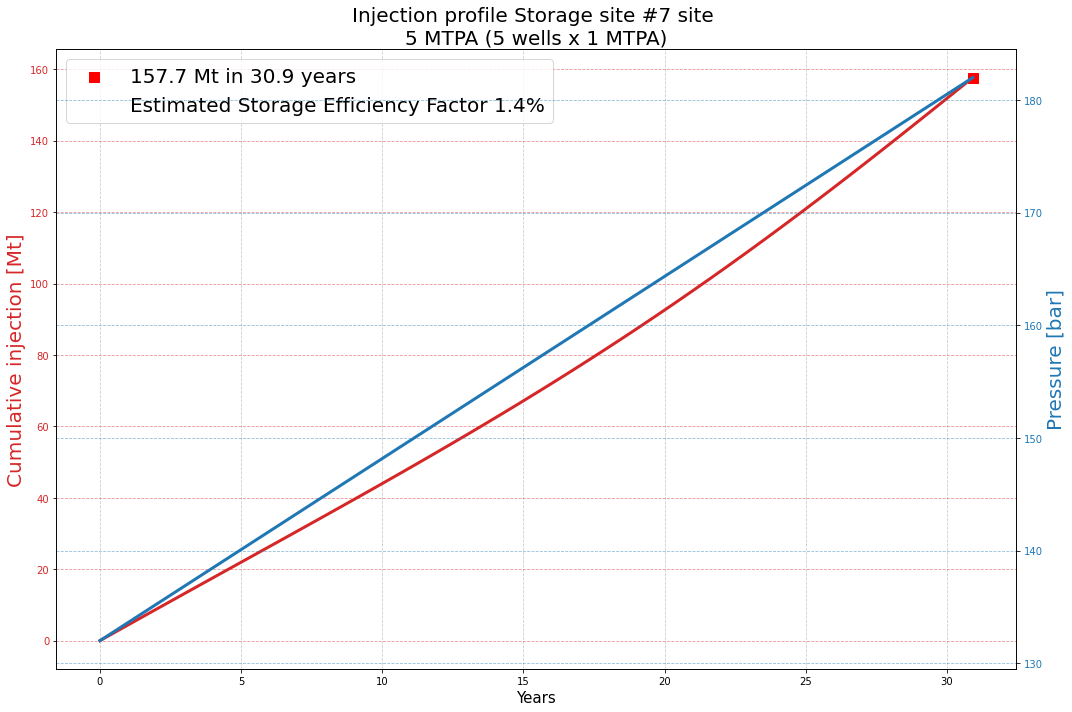

In [11]:
fig, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(15, 10),sharey=True)

color = 'tab:red'
ax1.set_xlabel('Years', fontsize=15)
ax1.set_ylabel('Cumulative injection [Mt]', color=color, fontsize=20)
ax1.set_title(f'Injection profile {df.Prospect[i]} site \n{inj} MTPA (5 wells x 1 MTPA)', fontsize=20)

ax1.plot(Time, Mts, color=color, linewidth=3, linestyle="-")
ax1.tick_params(axis='y', labelcolor=color)

#show gridlines
ax1.grid(True, axis ='y', linestyle='--', c=color, alpha=0.5)
ax1.grid(True, axis ='x', linestyle='--', c='k', alpha=0.2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Pressure [bar]', color=color, fontsize=20)  # we already handled the x-label with ax1
ax2.plot(Time, P, color=color, linewidth=3, linestyle="-")
ax2.tick_params(axis='y', which='both', labelcolor=color)

#show gridlines
ax2.grid(True, axis ='y', linestyle='--', c=color, alpha=0.5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

ax1.scatter(Time.max(), Mts.max(), s=100, c='red', marker='s',label=f'{round(Mts.max(),1)} Mt in {round(Time.max(),1)} years')
#ax1.scatter(0, 0, s=1, c='white', marker='s',label=f'Estimated Storage Efficiency Factor {round(100*(VsCO2.max()/(VsCO2.max()+npv[i])),1)}%')
ax1.scatter(0, 0, s=1, c='white', marker='s',label=f'Estimated Storage Efficiency Factor {round(400*(VsCO2.max()/(VsCO2.max()+npv[i])),1)}%')

ax1.legend(loc='upper left', frameon=True, fontsize=20)

plt.show()

# If you want to save the graph as a png unquote the below line
#plt.savefig("Injectivity_Capacity.png", dpi=300)


